# RFCrypto

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

COIN = 'ETHBUSD'
TIME = '15m'

In [2]:
# !python data_loader.py --coin ETHBUSD --time 15m

## Klines

In [3]:
klines = pd.read_csv(f'./klines/{COIN}_{TIME}.csv')
klines = klines.iloc[:,1:]
klines['timestamp'] = pd.to_datetime(klines.timestamp)
klines

,timestamp,open,high,low,close,volume,closetime,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,time
0,2021-06-01 00:00:00,2707.80,2741.00,2690.40,2732.59,6134.04489,1622506499999,1.670008e+07,13064,3511.87402,2021-06-01
1,2021-06-01 00:15:00,2732.39,2735.00,2709.49,2731.91,3943.25200,1622507399999,1.073804e+07,8394,2103.14865,2021-06-01
2,2021-06-01 00:30:00,2731.89,2734.80,2711.20,2726.41,3342.66059,1622508299999,9.106633e+06,6827,1623.14399,2021-06-01
3,2021-06-01 00:45:00,2726.75,2741.18,2721.35,2731.50,2911.44054,1622509199999,7.948450e+06,6138,1369.58144,2021-06-01
4,2021-06-01 01:00:00,2731.51,2731.51,2705.21,2712.00,2918.81128,1622510099999,7.933974e+06,6376,1234.01674,2021-06-01
...,...,...,...,...,...,...,...,...,...,...,...
28385,2022-03-23 22:45:00,3004.21,3011.00,3003.71,3006.08,789.46730,1648076399999,2.373306e+06,1449,244.52680,2022-03-23
28386,2022-03-23 23:00:00,3005.85,3006.60,2996.64,2996.65,606.37560,1648077299999,1.820989e+06,1710,257.06830,2022-03-23
28387,2022-03-23 23:15:00,2996.64,3018.74,2993.94,3015.11,1037.91870,1648078199999,3.119737e+06,2940,584.02730,2022-03-23
28388,2022-03-23 23:30:00,3015.11,3022.53,3008.21,3020.63,1136.97390,1648079099999,3.429511e+06,2812,652.72350,2022-03-23


## Labeled data

In [4]:
import json

with open(f'./labeled/{COIN}_{TIME}_labels.json', 'r') as fIn:
    labels = json.load(fIn)

labeled_data = labels[0]['annotations'][0]['result']
labeled_data

[{'value': {'start': '2021-06-01 04:45:00',
   'end': '2021-06-01 05:45:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': 'KVacxd4Rne',
  'from_name': 'predictable',
  'to_name': 'stock',
  'type': 'timeserieslabels',
  'origin': 'manual'},
 {'value': {'start': '2021-06-01 09:15:00',
   'end': '2021-06-01 11:30:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': '3owgv3vTyQ',
  'from_name': 'predictable',
  'to_name': 'stock',
  'type': 'timeserieslabels',
  'origin': 'manual'},
 {'value': {'start': '2021-06-01 19:30:00',
   'end': '2021-06-01 23:30:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': 'SepYA51cG8',
  'from_name': 'predictable',
  'to_name': 'stock',
  'type': 'timeserieslabels',
  'origin': 'manual'},
 {'value': {'start': '2021-06-02 01:00:00',
   'end': '2021-06-02 15:00:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': 'M3rMMCp9j7',
  'from_name': 'predictable',
  'to_name': 'stock',
  'ty

In [5]:
dict_labels = {}
count = 0
for value in labeled_data:
    if value['value']['end'] == '0NaN-NaN-NaN NaN:NaN:NaN':
        pass
    else:
        count +=1
        dict_labels[count] = [value['value']['start'], 1]
        count +=1
        dict_labels[count] = [value['value']['end'], 2]

labels = pd.DataFrame.from_dict(dict_labels, orient='index', columns=['timestamp', 'label'])
labels['timestamp'] = pd.to_datetime(labels.timestamp)

labels

,timestamp,label
1,2021-06-01 04:45:00,1
2,2021-06-01 05:45:00,2
3,2021-06-01 09:15:00,1
4,2021-06-01 11:30:00,2
5,2021-06-01 19:30:00,1
...,...,...
984,2022-03-23 23:30:00,2
985,2022-03-23 13:45:00,1
986,2022-03-23 15:45:00,2
987,2022-03-23 05:00:00,1


In [6]:
klines_label = klines.merge(labels, on='timestamp', how='outer')
klines_label = klines_label.fillna(0)

for i, row in klines_label.iterrows():
    if i > 1:
        last_row = klines_label.label.iloc[i-1]
        if last_row == 0 and row.label == 1:
            klines_label.loc[i, 'label'] = 1
        elif last_row == 1 and row.label == 0:
            klines_label.loc[i, 'label'] = 1
        elif last_row == 1 and row.label == 2:
            klines_label.loc[i, 'label'] = 2
        elif last_row == 2 and row.label == 0:
            klines_label.loc[i, 'label'] = 0
        else:
            klines_label.loc[i, 'label'] = 0
    else:
        pass

klines_label = klines_label.replace(2, 1)
klines_label['label'] = klines_label.label.shift(1)
klines_label = klines_label.fillna(0)
# klines['time'] = pd.to_datetime(klines['timestamp'].dt.strftime('%Y-%m-%d'))
klines_label

,timestamp,open,high,low,close,volume,closetime,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,time,label
0,2021-06-01 00:00:00,2707.80,2741.00,2690.40,2732.59,6134.04489,1622506499999,1.670008e+07,13064,3511.87402,2021-06-01,0.0
1,2021-06-01 00:15:00,2732.39,2735.00,2709.49,2731.91,3943.25200,1622507399999,1.073804e+07,8394,2103.14865,2021-06-01,0.0
2,2021-06-01 00:30:00,2731.89,2734.80,2711.20,2726.41,3342.66059,1622508299999,9.106633e+06,6827,1623.14399,2021-06-01,0.0
3,2021-06-01 00:45:00,2726.75,2741.18,2721.35,2731.50,2911.44054,1622509199999,7.948450e+06,6138,1369.58144,2021-06-01,0.0
4,2021-06-01 01:00:00,2731.51,2731.51,2705.21,2712.00,2918.81128,1622510099999,7.933974e+06,6376,1234.01674,2021-06-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28385,2022-03-23 22:45:00,3004.21,3011.00,3003.71,3006.08,789.46730,1648076399999,2.373306e+06,1449,244.52680,2022-03-23,1.0
28386,2022-03-23 23:00:00,3005.85,3006.60,2996.64,2996.65,606.37560,1648077299999,1.820989e+06,1710,257.06830,2022-03-23,1.0
28387,2022-03-23 23:15:00,2996.64,3018.74,2993.94,3015.11,1037.91870,1648078199999,3.119737e+06,2940,584.02730,2022-03-23,1.0
28388,2022-03-23 23:30:00,3015.11,3022.53,3008.21,3020.63,1136.97390,1648079099999,3.429511e+06,2812,652.72350,2022-03-23,1.0


## Merge & Feature Eng.

In [7]:
import pandas_ta as pta
import numpy as np

# df = klines_label.merge(greed, left_on='time', right_on='time')
df = klines_label.copy()
df = df[['timestamp', 'open', 'high', 'low', 'close', 'volume', 'numberoftrades', 'label']]

df['candle_hight'] = 100 * (df.high - df.low)/((df.high + df.low)/2)
df['price_change'] = df['close'].pct_change()*100
df['FASTMA'] = df.close.ewm(40).mean() # 30 $26 %32
df['SLOWMA'] = df.close.ewm(200).mean() # 100 $26 %32
df['FASTSlope'] = np.degrees(np.arctan(df['FASTMA'].diff()/40))
df['SLOWSlope'] = np.degrees(np.arctan(df['SLOWMA'].diff()/200))
df['RSI'] = pta.rsi(df.close)
df['Slope'] = pta.slope(df.close, length=7)
df['AROON'] = pta.aroon(df['high'], df['low'])['AROONU_14']
df['BBAND'] = pta.bbands(df['close'], length=14, std=2, talib=False)['BBP_14_2.0']
df['OBV'] = pta.bbands(close=df['close'], volume=df['volume'])['BBP_5_2.0']
df['MACD'] = pta.macd(close=df['close'])['MACD_12_26_9']

df = df.dropna()
df = df.sort_values('timestamp')
df

,timestamp,open,high,low,close,volume,numberoftrades,label,candle_hight,price_change,FASTMA,SLOWMA,FASTSlope,SLOWSlope,RSI,Slope,AROON,BBAND,OBV,MACD
25,2021-06-01 06:15:00,2695.60,2696.49,2658.00,2670.59,3699.26372,8328,0.0,1.437672,-0.927808,2669.103813,2670.709837,0.115543,-0.001464,47.891745,1.852857,85.714286,0.613074,0.243675,0.866061
26,2021-06-01 06:30:00,2670.27,2670.27,2640.63,2649.41,3728.86129,8628,0.0,1.116195,-0.793083,2668.116685,2669.868744,-1.413670,-0.240954,41.949214,1.770000,78.571429,0.381532,0.076185,-1.005566
27,2021-06-01 06:45:00,2649.48,2663.12,2641.41,2657.87,2757.03177,6346,0.0,0.818546,0.319316,2667.615968,2669.410743,-0.717187,-0.131208,44.890687,0.235714,71.428571,0.478723,0.290497,-1.785610
28,2021-06-01 07:00:00,2657.87,2680.06,2649.28,2658.48,4332.12631,8829,0.0,1.155115,0.022951,2667.180193,2669.006913,-0.624177,-0.115689,45.106670,-1.075714,64.285714,0.463953,0.377093,-2.327745
29,2021-06-01 07:15:00,2658.42,2658.49,2637.97,2638.28,3009.71810,6877,0.0,0.774857,-0.759833,2665.833087,2667.906892,-1.928857,-0.315130,39.575376,-7.531429,57.142857,0.205182,0.111659,-4.337364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28385,2022-03-23 22:45:00,3004.21,3011.00,3003.71,3006.08,789.46730,1449,1.0,0.242406,0.068575,2980.173870,2938.236941,0.927614,0.097178,59.936943,4.208571,92.857143,0.818326,0.615393,6.054262
28386,2022-03-23 23:00:00,3005.85,3006.60,2996.64,2996.65,606.37560,1710,1.0,0.331821,-0.313698,2980.575727,2938.527553,0.575598,0.083254,54.273215,2.335714,85.714286,0.622976,0.088093,5.780618
28387,2022-03-23 23:15:00,2996.64,3018.74,2993.94,3015.11,1037.91870,2940,1.0,0.824923,0.616021,2981.418026,2938.908560,1.206327,0.109150,61.869263,3.015714,100.000000,0.924836,0.852005,6.972941
28388,2022-03-23 23:30:00,3015.11,3022.53,3008.21,3020.63,1136.97390,2812,1.0,0.474900,0.183078,2982.374416,2939.315134,1.369666,0.116475,63.805471,3.177143,100.000000,0.949985,0.858852,8.267976


## Model

In [8]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'numberoftrades',
       'label', 'candle_hight', 'price_change', 'FASTMA', 'SLOWMA',
       'FASTSlope', 'SLOWSlope', 'RSI', 'Slope', 'AROON', 'BBAND', 'OBV',
       'MACD'],
      dtype='object')

In [9]:
ml = df.copy()

to_remove = ['timestamp', 'FASTMA', 'SLOWMA', 'SLOWSlope', 'FASTSlope', 'open', 'high', 'low', 'close','label']

columns = df.columns
columns = [i for i in columns if i not in to_remove]
columns.append('label')

ml = ml[columns] # label at the end
ml = ml.astype('float32')
ml.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,28365.0,1830.561523,1679.797363,55.861500,821.860718,1341.258057,2230.106934,27192.431641
numberoftrades,28365.0,4602.641113,3458.094238,271.000000,2538.000000,3626.000000,5479.000000,57280.000000
candle_hight,28365.0,0.641507,0.437205,0.067861,0.375899,0.529723,0.772201,15.222389
price_change,28365.0,0.001510,0.466700,-10.647648,-0.228910,0.001750,0.235956,10.908840
RSI,28365.0,50.439426,11.833775,6.572289,42.863991,50.517670,57.992516,90.334961
Slope,28365.0,0.012020,5.442102,-103.655716,-2.631428,0.068571,2.725714,74.332855
AROON,28365.0,46.833118,36.192139,0.000000,14.285714,42.857143,78.571426,100.000000
BBAND,28365.0,0.503620,0.320822,-0.372724,0.253881,0.513607,0.754137,1.374479
OBV,28365.0,0.501766,0.285545,0.000070,0.244820,0.507240,0.756920,0.999636
MACD,28365.0,0.078415,16.147299,-111.855942,-7.700140,0.538600,8.713444,77.566177


<AxesSubplot:>

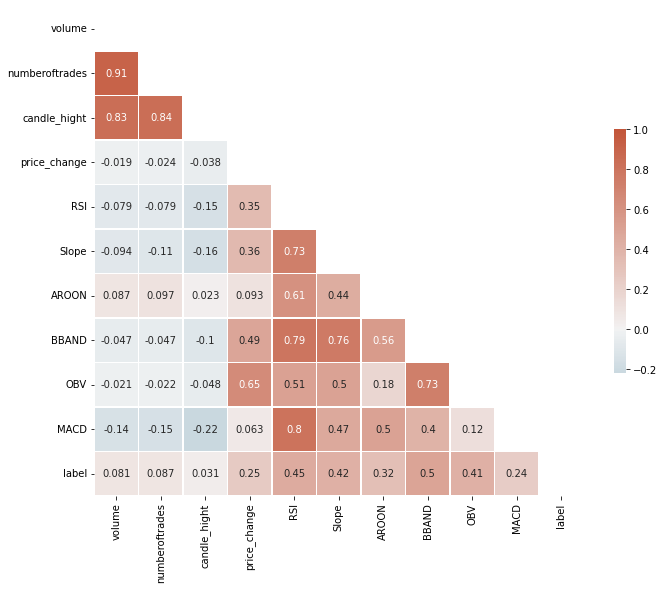

In [10]:
import seaborn as sns

corr = ml.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
# pd.plotting.scatter_matrix(ml, figsize=(10,10), color='black', alpha=0.75, diagonal='kde', grid=True)

In [12]:
# Function from https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [13]:
total_columns = len(ml.columns)

reframed = series_to_supervised(ml, 28, 1)
variable_name = f'var11'

# remove the label column from each time step
columns = []
for columnName, columnData in reframed.iteritems():
    if variable_name in columnName:
        if columnName == variable_name+'(t)':
            pass
        else:
            columns.append(columnName)

reframed = reframed.drop(columns, axis=1)

# remove the last time step but not the label
columns_to_remove = reframed.iloc[:, -total_columns:-1].columns
reframed = reframed.drop(columns_to_remove, axis=1)
reframed

,var1(t-28),var2(t-28),var3(t-28),var4(t-28),var5(t-28),var6(t-28),var7(t-28),var8(t-28),var9(t-28),var10(t-28),...,var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t)
53,3699.263672,8328.0,1.437672,-0.927808,47.891747,1.852857,85.714287,0.613074,0.243675,0.866061,...,13395.0,1.571970,-0.689825,33.980301,-11.355714,57.142857,-0.008413,0.079561,-17.549778,0.0
54,3728.861328,8628.0,1.116195,-0.793083,41.949215,1.770000,78.571426,0.381532,0.076185,-1.005566,...,13888.0,2.746151,2.409501,49.612492,-4.002857,50.000000,0.564706,0.843397,-14.862483,0.0
55,2757.031738,6346.0,0.818546,0.319316,44.890686,0.235714,71.428574,0.478723,0.290497,-1.785610,...,23481.0,2.563961,1.973684,58.491405,4.041429,100.000000,0.952896,0.921009,-8.492979,0.0
56,4332.126465,8829.0,1.155115,0.022951,45.106670,-1.075714,64.285713,0.463953,0.377093,-2.327745,...,13751.0,1.409551,-0.688147,54.794403,8.431429,92.857140,0.764316,0.715474,-4.861682,0.0
57,3009.718018,6877.0,0.774857,-0.759833,39.575375,-7.531428,57.142857,0.205182,0.111659,-4.337364,...,9851.0,0.976044,-0.522439,52.119560,6.072857,85.714287,0.651240,0.569863,-3.058908,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28385,3611.115234,6826.0,0.362498,-0.002967,78.765953,7.424286,100.000000,0.937971,0.800969,17.218464,...,3000.0,0.462708,-0.204639,59.070534,3.022857,100.000000,0.833232,0.598329,5.355324,1.0
28386,3357.130127,6849.0,0.959353,-0.523251,67.234901,4.545714,100.000000,0.752174,0.426125,17.497726,...,1449.0,0.242406,0.068575,59.936943,4.208571,92.857140,0.818326,0.615393,6.054262,1.0
28387,1485.149658,3208.0,0.592948,0.280734,69.777901,5.365714,92.857140,0.784407,0.546604,18.192787,...,1710.0,0.331821,-0.313698,54.273216,2.335714,85.714287,0.622976,0.088093,5.780618,1.0
28388,1399.627441,3729.0,0.575340,-0.451156,61.494560,1.085714,85.714287,0.634709,0.139669,17.441137,...,2940.0,0.824923,0.616021,61.869263,3.015714,100.000000,0.924836,0.852005,6.972941,1.0


### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

X = reframed.drop([variable_name+'(t)'], axis=1)
y = reframed[variable_name+'(t)']

X1 = df.drop(['label'], axis=1)
y1 = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
_, X_backtest, _, y_backtest = train_test_split(X1, y1, test_size=0.3, random_state=42, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(19835, 280)
(19835,)
0.0    13287
1.0     6548
Name: var11(t), dtype: int64


### Random Forest

In [19]:
import pickle
model = pickle.load(open(f'./models/{COIN}.sav', 'rb'))

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#### Predict and confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[5368,  347],
       [1803,  984]], dtype=int64)

#### Precision, Recall and F1 Score

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision Score, Recall Score and F1 Score
precision_score_p = precision_score(y_test, y_pred)
print('Precision Score: ', precision_score_p)

recall_score_p = recall_score(y_test, y_pred)
print('Recall Score: ', recall_score_p)

f1_score_p = f1_score(y_test, y_pred)
print('F1 Score: ', f1_score_p)

Precision Score:  0.7392937640871525
Recall Score:  0.35306781485468247
F1 Score:  0.47790189412336087


#### Precision Recall Curve

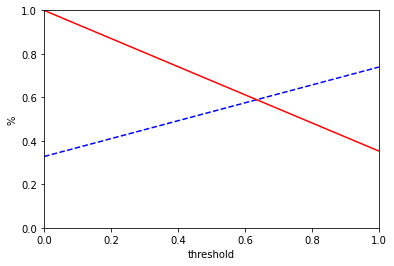

In [18]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'r-', label='Recall')
    plt.xlabel('threshold')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.ylabel('%')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

#### Roc Curve

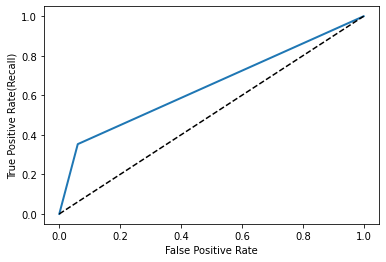

ROC Score:  0.6461752022654863


In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# plot the Roc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate(Recall)')

plot_roc_curve(fpr, tpr)
plt.show()

print('ROC Score: ', roc_auc_score(y_test, y_pred))

## BackTest & Visualise

In [20]:
t_start = 0
t_end = 11700
threshold = .5
start = len(X_backtest) - len(X_test) - 1

yhat = model.predict_proba(X_test)
yhat = [i[1] for i in yhat]

price = X_backtest.iloc[start:,4].to_list()
slowma = X_backtest.iloc[start:,9].to_list()
slowma100 = X_backtest.iloc[start:,10].to_list()
slope = X_backtest.iloc[start:,11].to_list()
slope100 = X_backtest.iloc[start:,12].to_list()

new_order = False
amount = 100
leverage = 1
quantity=0
total=0
bought_price=0
total_earned = []
bought_at = []
amount_plot = []
win_percentage = []
prediction_data = []
price_data = []

for i in range(t_start, t_end):
    try:
        prediction = yhat[i]
        coin_price = price[i]
        price_data.append(coin_price)
        amount_plot.append(amount)
        prediction_data.append(prediction)

        if (new_order is False) and ((prediction > threshold) and (slope[i] > 0) and (slope100[i] > 0)):
            quantity = round(amount / coin_price, 5)
            bought_price = coin_price
            total_earned.append(0)
            bought_at.append(1)
            new_order = True

        elif (new_order is True) and (((prediction < threshold) and (slope100[i] < 0)) or (coin_price < bought_price * .99)):
            total_earn = (quantity * coin_price - amount) * leverage
            win_percentage.append(1 - bought_price / coin_price)
            amount = amount + total_earn
            total += total_earn
            total_earned.append(total_earn)
            bought_at.append(0)

            new_order = False

        else:
            bought_at.append(0)
            total_earned.append(0)
            pass

    except:
        pass

total

6.264349800000019

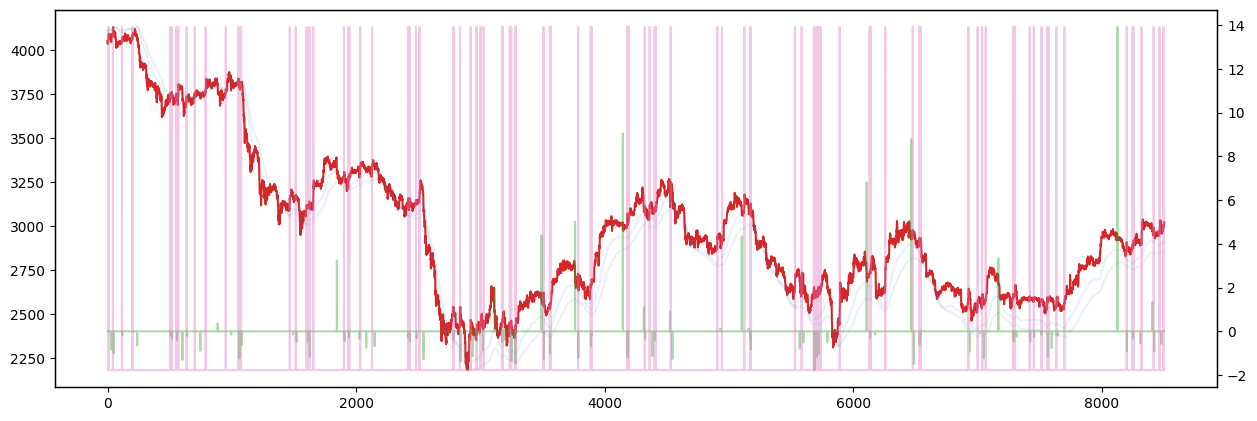

In [35]:
fig, ax1 = plt.subplots(figsize=(15,5), dpi=100)
color = 'tab:red'
ax1.plot(price_data, color=color)
# ax1.axes.yaxis.set_visible(False)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(slowma[t_start:t_end], color=color, alpha=0.1)
ax2.axes.yaxis.set_visible(False)

ax3 = ax1.twinx()
color = 'tab:blue'
ax3.plot(slowma100[t_start:t_end], color=color, alpha=0.1)
ax3.axes.yaxis.set_visible(False)

ax4 = ax1.twinx()
color = 'tab:green'
ax4.plot(total_earned, color=color, alpha=0.4)
# ax3.axes.yaxis.set_visible(False)

ax5 = ax1.twinx()
color = 'tab:pink'
ax5.plot(bought_at, color=color, alpha=0.4)
ax5.axes.yaxis.set_visible(False)

In [132]:
positive = 0
negative = 0

total_earn = 0
total_loss = 0

for i in total_earned:
    if i == 0:
        pass
    elif i > 0:
        positive = positive + 1
        total_earn = total_earn + i
    else:
        negative = negative + 1
        total_loss = total_loss + i

perc = positive/(positive+negative)

print('Total Trades: ', positive+negative)
print('Total Positive: ', positive, total_earn)
print('Total Negative: ', negative, total_loss)
print('Winning Rate: ', perc)
print('Average Profit: ', np.mean(win_percentage))

Total Trades:  44
Total Positive:  13 70.31980349999996
Total Negative:  31 -32.712251499999994
Winning Rate:  0.29545454545454547
Average Profit:  0.006706883583055782


In [98]:
pd.Series(win_percentage).sort_values(ascending=False) * 100

16    12.452001
49    11.874813
38     7.982770
36     6.568604
11     5.632162
7      4.757690
23     4.142506
43     3.244597
20     0.537205
53     0.469605
37    -0.121915
5     -0.124905
9     -0.238283
45    -0.239389
15    -0.266288
51    -0.298704
27    -0.384365
48    -0.395187
18    -0.403324
26    -0.463505
4     -0.474028
52    -0.487066
31    -0.501014
44    -0.509723
35    -0.537775
40    -0.551361
2     -0.552216
13    -0.570786
42    -0.572307
39    -0.580691
32    -0.625958
29    -0.657602
47    -0.661387
22    -0.677896
14    -0.685969
19    -0.711959
41    -0.728624
50    -0.795320
1     -0.798924
3     -0.832618
54    -0.847787
25    -0.851900
30    -1.074566
33    -1.121441
46    -1.138672
28    -1.162658
10    -1.193809
34    -1.196483
0     -1.229825
21    -1.339676
12    -1.380199
24    -1.428127
8     -1.480057
6     -1.614728
17    -1.759355
dtype: float64

#### Feature Importance

[]

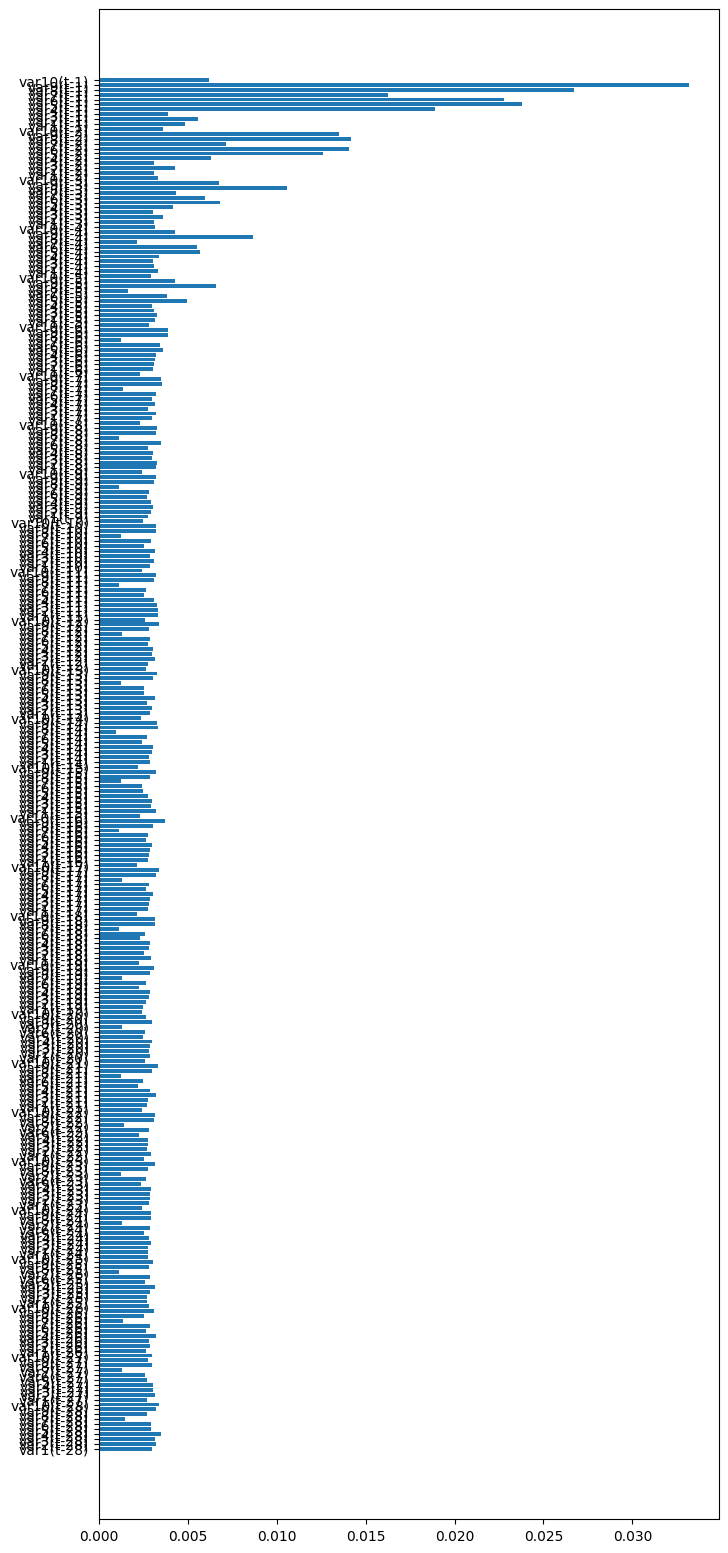

In [280]:
from matplotlib.pyplot import figure
columns = list(X_train.columns)
features_importance = model.feature_importances_
figure(figsize=(8, 20), dpi=100)
plt.barh(columns, features_importance)
plt.plot()

## Save Model!

In [119]:
import pickle
filename = f'./models/{COIN}.sav'
pickle.dump(model, open(filename, 'wb'))

## Test with Real data

In [1]:
from sqlalchemy import create_engine
import json

def db_connection():
    f = open("keys.json")
    data = json.load(f)
    engine = create_engine(data['connection'])

    return engine

with open('keys.json', 'r') as fIn:
    keys = json.load(fIn)

In [18]:
import pandas as pd
# AND timestamp BETWEEN '2022-03-30 09:00:00' AND '2022-03-30 23:00:00'
data = pd.read_sql_query("SELECT timestamp, price, prediction FROM data WHERE COIN = 'ETHBUSD' AND timestamp BETWEEN '2022-04-06 00:00:00' AND '2022-04-06 09:00:00'", db_connection(), index_col='timestamp')
data

,price,prediction
timestamp,,
2022-04-06 00:00:31,3446.33,0.223333
2022-04-06 00:01:03,3446.14,0.230000
2022-04-06 00:01:36,3443.64,0.223333
2022-04-06 00:02:08,3440.78,0.223333
2022-04-06 00:02:40,3439.81,0.220000
...,...,...
2022-04-06 08:57:51,3350.70,0.230000
2022-04-06 08:58:23,3348.48,0.233333
2022-04-06 08:58:55,3345.95,0.226667


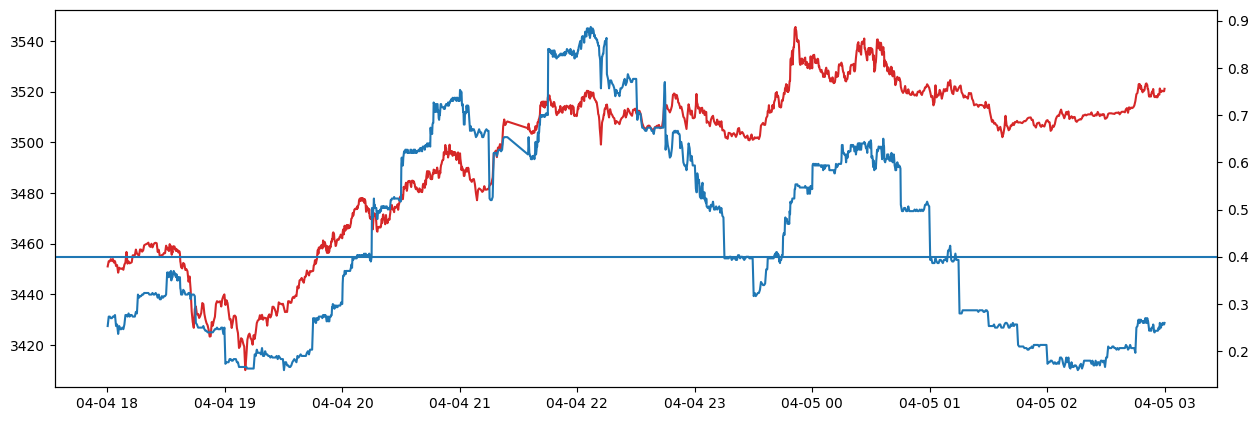

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15,5), dpi=100)
color = 'tab:red'
ax1.plot(data.price, color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(data.prediction, color=color)
# ax2.set_ylim(0,1)
ax2.axhline(y=.4, color=color, linestyle='-')

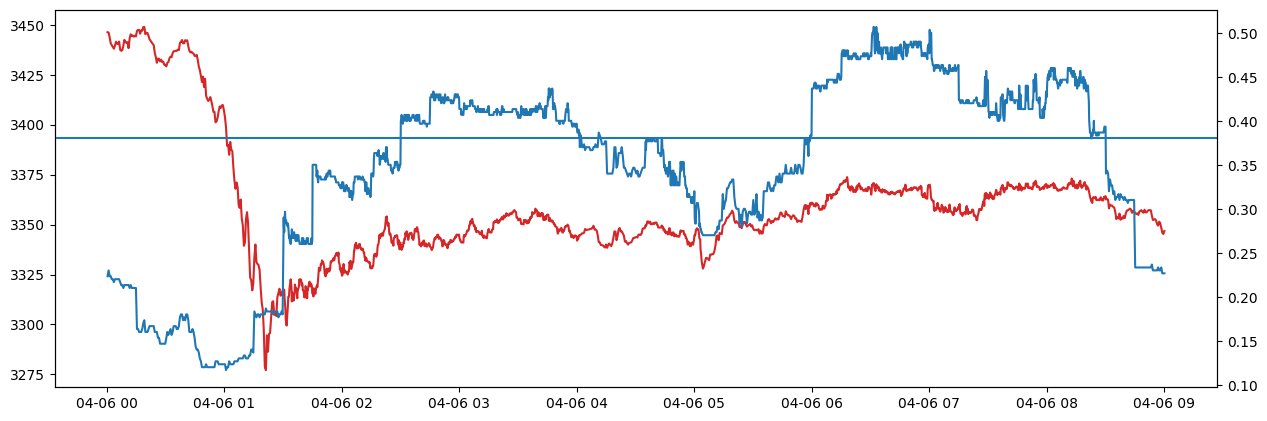

In [20]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15,5), dpi=100)
color = 'tab:red'
ax1.plot(data.price, color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(data.prediction, color=color)
# ax2.set_ylim(0,1)
ax2.axhline(y=.38, color=color, linestyle='-')